### Actividad 3.1 (Regresión Lineal Simple y Múltiple)

Ivanna Maldonado Cervantes 

Paula Simonetta Madrid Pérez

Ania Diaz Gonzalez 

Miranda Eugenia Colorado Arróniz

Omar Alejandro Quinn


In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [497]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')

print("\nPrimeras filas del dataframe:")
df


Primeras filas del dataframe:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1,412,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1,400,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1,403,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7,400,17.500000


Revisamos las columnas y sus tipos de datos

In [498]:
print("\nNombre de las columnas y sus tipos de datos:")
df.dtypes


Nombre de las columnas y sus tipos de datos:


TaxonName                            object
TaxonCode                            object
SamplingOperations_code              object
CodeSite_SamplingOperations          object
Date_SamplingOperation               object
Abundance_nbcell                      int64
TotalAbundance_SamplingOperation      int64
Abundance_pm                        float64
dtype: object

Examinar las frecuencias de las variables categóricas "TaxonName", "TaxonCode", "SamplingOperations_code", "CodeSite_SamplingOperations" y "Date_SamplingOperation"

In [499]:
#Frecuencias de mayor a menor para cada una
print("\nFrecuencias de TaxonName:")
print(df['TaxonName'].value_counts())
print()

print("\nFrecuencias de TaxonCode:")
print(df['TaxonCode'].value_counts())
print()

print("\nFrecuencias de SamplingOperations_code:")
print(df['SamplingOperations_code'].value_counts())
print()

print("\nFrecuencias de CodeSite_SamplingOperations:")
print(df['CodeSite_SamplingOperations'].value_counts())
print()

print("\nFrecuencias de Date_SamplingOperation:")
print(df['Date_SamplingOperation'].value_counts())
print()


Frecuencias de TaxonName:
TaxonName
Achnanthes minutissima      43691
Amphora pediculus           39209
Cocconeis euglypta          38570
Sellaphora nigri            38039
Navicula cryptotenella      37723
                            ...  
Encyonopsis neoamphioxys        1
Encyonopsis recta               1
Lindavia bodanica               1
Leptocylindrus minimus          1
Eunotia perpusilla              1
Name: count, Length: 2292, dtype: int64


Frecuencias de TaxonCode:
TaxonCode
Achmi02    43691
Amppe02    39209
Coceu01    38570
Selni01    38039
Navcr09    37723
           ...  
Encne03        1
Encre01        1
Linbo01        1
Lepmi01        1
Eunpe02        1
Name: count, Length: 2292, dtype: int64


Frecuencias de SamplingOperations_code:
SamplingOperations_code
S05051000_20080722    97
S05119000_20160627    97
S05068700_20070904    94
S04103550_20150811    92
S04215520_20200702    92
                      ..
S05192040_20170914     2
S05224100_20080821     2
S05221600_20080826

Convertirlas a númericas según su frecuencia

In [500]:
df_numeric = df.copy()

variables_categoricas = ['TaxonName', 'TaxonCode', 'SamplingOperations_code', 
                        'CodeSite_SamplingOperations', 'Date_SamplingOperation']

for variable in variables_categoricas:    
    frecuencias = df[variable].value_counts() #Contamos las frecuencias
    
    mapeo = {} 
    for i, valor in enumerate(frecuencias.index): #Mapeamos el valor de la más frecuente a 1, y asi sucesivamente
        mapeo[valor] = i + 1
    df_numeric[variable] = df[variable].map(mapeo) #Aplicamos el mapeo a la columna

Verificamos los tipos del datos del df convertido

In [501]:
print("\nTipos de datos en el dataframe convertido:")
print(df_numeric.dtypes)


Tipos de datos en el dataframe convertido:
TaxonName                             int64
TaxonCode                             int64
SamplingOperations_code               int64
CodeSite_SamplingOperations           int64
Date_SamplingOperation                int64
Abundance_nbcell                      int64
TotalAbundance_SamplingOperation      int64
Abundance_pm                        float64
dtype: object


#### **Regresión lineal simple**

Calculamos las correlaciones entre todas las variables para identificar los 5 pares con mayor correlación

In [502]:
print("\nMatriz de correlación:")
Corr_Factors = df_numeric.corr()
Corr_Factors


Matriz de correlación:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
TaxonName,1.000000,1.000000,-0.107305,-0.011925,0.010478,-0.131807,0.010570,-0.131876
TaxonCode,1.000000,1.000000,-0.107305,-0.011925,0.010478,-0.131807,0.010570,-0.131876
SamplingOperations_code,-0.107305,-0.107305,1.000000,0.240210,0.071392,0.156950,-0.025725,0.157256
CodeSite_SamplingOperations,-0.011925,-0.011925,0.240210,1.000000,0.034921,0.041136,0.033326,0.040755
Date_SamplingOperation,0.010478,0.010478,0.071392,0.034921,1.000000,0.013898,0.037350,0.013482
Abundance_nbcell,-0.131807,-0.131807,0.156950,0.041136,0.013898,1.000000,0.006612,0.999606
TotalAbundance_SamplingOperation,0.010570,0.010570,-0.025725,0.033326,0.037350,0.006612,1.000000,-0.004262
Abundance_pm,-0.131876,-0.131876,0.157256,0.040755,0.013482,0.999606,-0.004262,1.000000


Encontramos el valor absoluto de todas las correlaciones entre las variables 

In [503]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
TaxonName,1.000000,1.000000,0.107305,0.011925,0.010478,0.131807,0.010570,0.131876
TaxonCode,1.000000,1.000000,0.107305,0.011925,0.010478,0.131807,0.010570,0.131876
SamplingOperations_code,0.107305,0.107305,1.000000,0.240210,0.071392,0.156950,0.025725,0.157256
CodeSite_SamplingOperations,0.011925,0.011925,0.240210,1.000000,0.034921,0.041136,0.033326,0.040755
Date_SamplingOperation,0.010478,0.010478,0.071392,0.034921,1.000000,0.013898,0.037350,0.013482
Abundance_nbcell,0.131807,0.131807,0.156950,0.041136,0.013898,1.000000,0.006612,0.999606
TotalAbundance_SamplingOperation,0.010570,0.010570,0.025725,0.033326,0.037350,0.006612,1.000000,0.004262
Abundance_pm,0.131876,0.131876,0.157256,0.040755,0.013482,0.999606,0.004262,1.000000


Graficamos el mapa de calor de los coeficientes de correlación

<Axes: >

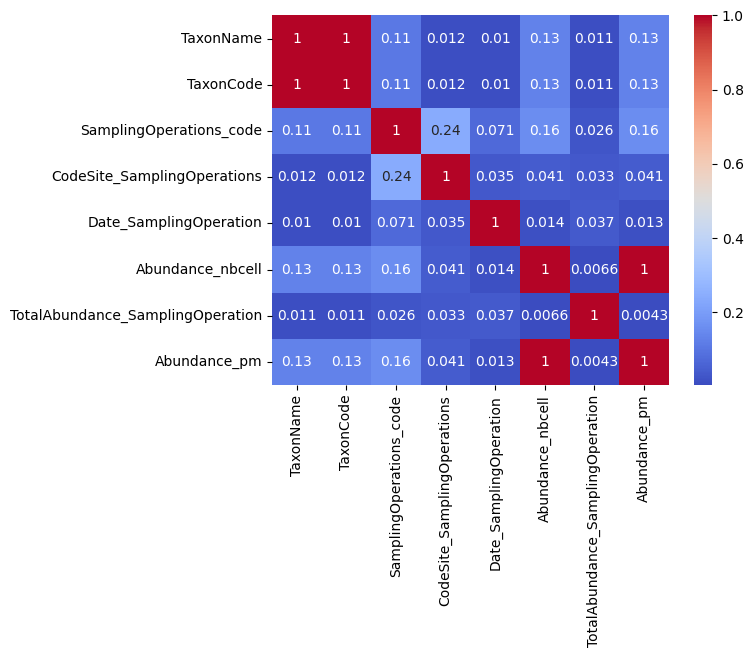

In [504]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm', annot=True)  
Heat_Map

Ajustamos el mapa de calor de los coeficientes de correlación 

<Axes: >

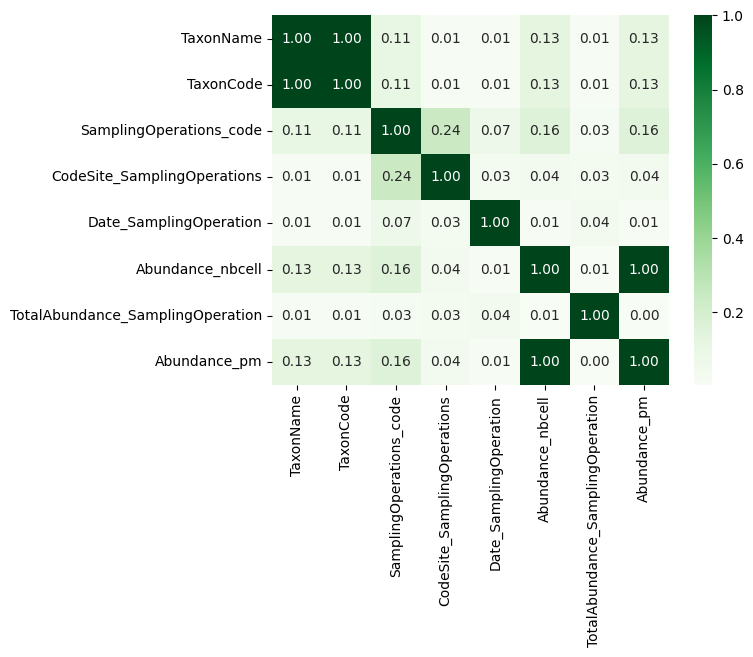

In [505]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'Greens', annot=True, fmt=".2f")  
Heat_Map

Tabla de los 5 pares:

In [506]:
# Creamos un DataFrame con los 5 pares y su interpretación
top5 = pd.DataFrame({
    'Par de Variables': [
        'TaxonName y TaxonCode',
        'Abundance_nbcell y Abundance_pm',
        'TotalAbundance_SamplingOperation y Abundance_pm',
        'TotalAbundance_SamplingOperation y Abundance_nbcell',
        'SamplingOperations_code y CodeSite_SamplingOperations'
    ],
    'Correlación': [1.00, 1.00, 1.00, 1.00, 0.24],
    'Interpretación': [
        'Correlación perfecta positiva, Ambas variables representan la misma información (especies) en diferente formato.',
        'Correlación perfecta positiva, Ambas miden abundancia de las mismas especies, solo en diferentes unidades.',
        'Correlación perfecta positiva, La abundancia total está directamente relacionada con la abundancia por muestra.',
        'Correlación perfecta positiva, Misma relación que el anterior, pero con la otra medida de abundancia.',
        'Correlación baja, Muestra una relación débil entre código de operación y sitio de muestreo.'
    ]
})
top5

,Par de Variables,Correlación,Interpretación
0,TaxonName y TaxonCode,1.00,"Correlación perfecta positiva, Ambas variables..."
1,Abundance_nbcell y Abundance_pm,1.00,"Correlación perfecta positiva, Ambas miden abu..."
2,TotalAbundance_SamplingOperation y Abundance_pm,1.00,"Correlación perfecta positiva, La abundancia t..."
3,TotalAbundance_SamplingOperation y Abundance_n...,1.00,"Correlación perfecta positiva, Misma relación ..."
4,SamplingOperations_code y CodeSite_SamplingOpe...,0.24,"Correlación baja, Muestra una relación débil e..."


#### **Regresión lineal múltiple**

*TaxonName*

In [507]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']]
Var_Dep= df_numeric['TaxonName']


In [508]:
model= LinearRegression()

In [509]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [510]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.0317946 , -0.24033951, -0.00095772]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(116.62584742904217)}

In [511]:
model.score(Vars_Indep,Var_Dep)

0.025075083314315072

In [512]:
y_pred= model.predict(X=df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']])
y_pred

array([ 79.550099  ,  87.73210246,  94.42347634, ...,  84.70327927,
       111.55663045, 113.31350874], shape=(1643872,))

In [513]:
df_numeric.insert(0, 'PrediccionesTname0', y_pred)
df_numeric

,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,94.423476,521,521,22522,1138,949,1,400,2.500000
3,111.896494,521,521,3617,6381,499,2,400,5.000000
4,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...
1643867,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,111.556630,1342,1342,669,461,245,7,400,17.500000


In [514]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
Abundance_nbcell                  -0.131807             -0.031795
Abundance_pm                      -0.131876             -0.240340
SamplingOperations_code           -0.107305             -0.000958


*TaxonCode*

In [515]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']]
Var_Dep= df_numeric['TaxonCode']

In [516]:
model= LinearRegression()

In [517]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [518]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.0317946 , -0.24033951, -0.00095772]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(116.62584742904217)}

In [519]:
model.score(Vars_Indep,Var_Dep)

0.025075083314315072

In [520]:
y_pred= model.predict(X=df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']])
y_pred

array([ 79.550099  ,  87.73210246,  94.42347634, ...,  84.70327927,
       111.55663045, 113.31350874], shape=(1643872,))

In [521]:
df_numeric.insert(0, 'PrediccionesTcode0', y_pred)
df_numeric

,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...
1643867,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [522]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
Abundance_nbcell                  -0.131807             -0.031795
Abundance_pm                      -0.131876             -0.240340
SamplingOperations_code           -0.107305             -0.000958


*SamplingOperations_code*

In [523]:
Vars_Indep= df_numeric[['CodeSite_SamplingOperations', 'Abundance_nbcell','Abundance_pm']]
Var_Dep= df_numeric['SamplingOperations_code']

In [524]:
model= LinearRegression()

In [525]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [526]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CodeSite_SamplingOperations', 'Abundance_nbcell', 'Abundance_pm'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([   1.72473048, -209.76398208,  114.52874796]),
 'rank_': 3,
 'singular_': array([2.36418747e+06, 9.42566546e+04, 9.23430283e+02]),
 'intercept_': np.float64(15079.113167577867)}

In [527]:
model.score(Vars_Indep,Var_Dep)

0.0796276680069411

In [528]:
y_pred= model.predict(X=df_numeric[['CodeSite_SamplingOperations', 'Abundance_nbcell','Abundance_pm']])
y_pred

array([19501.08892895, 16268.73680776, 17118.41434481, ...,
       15948.64037965, 16410.11913484, 18817.27387037], shape=(1643872,))

In [529]:
df_numeric.insert(0, 'PrediccionesSamplingO', y_pred)
df_numeric

,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...
1643867,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [530]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
CodeSite_SamplingOperations            0.240210              1.724730
Abundance_nbcell                       0.156950           -209.763982
Abundance_pm                           0.157256            114.528748


*CodeSite_SamplingOperations*

In [531]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'Abundance_nbcell','Abundance_pm']]
Var_Dep= df_numeric['CodeSite_SamplingOperations']

In [532]:
model= LinearRegression()

In [533]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [534]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'Abundance_nbcell', 'Abundance_pm'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 3.25945926e-02,  3.85077293e+01, -1.55455725e+01]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(1532.5389811897448)}

In [535]:
model.score(Vars_Indep,Var_Dep)

0.05797332814625955

In [536]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'Abundance_nbcell','Abundance_pm']])
y_pred

array([2641.85682284, 2494.59697159, 2266.27819408, ..., 2597.5329971 ,
       1551.85135066, 1623.38244946], shape=(1643872,))

In [537]:
df_numeric.insert(0, 'PrediccionesCodeSiteO', y_pred)
df_numeric

,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [538]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.240210              0.032595
Abundance_nbcell                   0.041136             38.507729
Abundance_pm                       0.040755            -15.545572


*Date_SamplingOperation*

In [539]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'Abundance_nbcell','CodeSite_SamplingOperations']]
Var_Dep= df_numeric['Date_SamplingOperation']

In [540]:
model= LinearRegression()

In [541]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [542]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'Abundance_nbcell',
        'CodeSite_SamplingOperations'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00205502, 0.04086034, 0.0042909 ]),
 'rank_': 3,
 'singular_': array([17408218.49826356,  2293720.30441318,    35047.84586538]),
 'intercept_': np.float64(425.82622124131564)}

In [543]:
model.score(Vars_Indep,Var_Dep)

0.0054390701069836345

In [544]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'Abundance_nbcell','CodeSite_SamplingOperations']])
y_pred

array([505.08838078, 489.29719974, 477.03328089, ..., 494.99500881,
       429.46515796, 440.72661334], shape=(1643872,))

In [545]:
df_numeric.insert(0, 'PrediccionesDateSamplingO', y_pred)
df_numeric

,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [546]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
SamplingOperations_code                0.071392              0.002055
Abundance_nbcell                       0.013898              0.040860
CodeSite_SamplingOperations            0.034921              0.004291


*Abundance_nbcell*

In [547]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'TaxonName']]
Var_Dep= df_numeric['Abundance_nbcell']

In [548]:
model= LinearRegression()

In [549]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [550]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'TaxonName'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.00029467, -0.02198636]),
 'rank_': 2,
 'singular_': array([17398799.71036601,   186641.69474616]),
 'intercept_': np.float64(8.094136105404967)}

In [551]:
model.score(Vars_Indep,Var_Dep)

0.03800428613886497

In [552]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'TaxonName']])
y_pred

array([-19.49387524, -20.71735219,   3.27584077, ..., -11.78286121,
       -21.21441871, -20.58706263], shape=(1643872,))

In [553]:
df_numeric.insert(0, 'PrediccionesAbnbcellO', y_pred)
df_numeric

,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [554]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.156950              0.000295
TaxonName                         -0.131807             -0.021986


*TotalAbundance_SamplingOperation*

In [555]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'CodeSite_SamplingOperations']]
Var_Dep= df_numeric['TotalAbundance_SamplingOperation']

In [556]:
model= LinearRegression()

In [557]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [558]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'CodeSite_SamplingOperations'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([-2.73839908e-05,  2.36031951e-04]),
 'rank_': 2,
 'singular_': array([17408217.60705897,  2293720.30218036]),
 'intercept_': np.float64(405.9778976726127)}

In [559]:
model.score(Vars_Indep,Var_Dep)

0.002318045545487535

In [560]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'CodeSite_SamplingOperations']])
y_pred

array([405.59222545, 405.32237186, 405.62975979, ..., 405.19190912,
       406.06838851, 406.4023731 ], shape=(1643872,))

In [561]:
df_numeric.insert(0, 'PrediccionesTotalAb0', y_pred)
df_numeric

,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,406.344626,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,406.197498,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,405.191909,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,406.068389,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [562]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
SamplingOperations_code               -0.025725             -0.000027
CodeSite_SamplingOperations            0.033326              0.000236


*Abundance_pm*

In [563]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'TaxonName', 'TaxonCode']]
Var_Dep= df_numeric['Abundance_pm']

In [564]:
model= LinearRegression()

In [565]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [566]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'TaxonName', 'TaxonCode'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00072733, -0.02708594, -0.02708594]),
 'rank_': 2,
 'singular_': array([1.73988114e+07, 2.63951039e+05, 1.12274072e-09]),
 'intercept_': np.float64(19.91855023003531)}

In [567]:
model.score(Vars_Indep,Var_Dep)

0.03810895412430615

In [568]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'TaxonName', 'TaxonCode']])
y_pred

array([-48.01166971, -51.03154065,   8.07591392, ..., -29.01389172,
       -52.29351819, -50.74503427], shape=(1643872,))

In [569]:
df_numeric.insert(0, 'PrediccionesAbpm0', y_pred)
df_numeric

,PrediccionesAbpm0,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-48.011670,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-51.031541,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,8.075914,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-5.674245,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2.556212,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,-52.195329,406.344626,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,-41.341395,406.197498,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,-29.013892,405.191909,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,-52.293518,406.068389,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [570]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.157256              0.000727
TaxonName                         -0.131876             -0.027086
TaxonCode                         -0.131876             -0.027086


# **3.1 Correlación no lineal**

In [571]:
df_numeric.head(5)

,PrediccionesAbpm0,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-48.011670,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-51.031541,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,8.075914,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-5.674245,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2.556212,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000


In [572]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(df_numeric)

## **TaxonName**

#### **Modelo 1 - Función cociente entre polinomios**

In [573]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['Abundance_pm']]
Var_Dep= df_numeric['TaxonName']

In [574]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [575]:
#modelo poliniomios: 
def func1(x, a, b, c):
    return ((a * x**2) + b) / (c * x**2)

In [576]:
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df_numeric['Abundance_pm'], df_numeric['TaxonName'])

In [577]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([ 747.51478099, 5444.60883631,   11.3851407 ])

In [578]:
# Predicciones
y_pred1 = func1(x, *parametros1)

In [579]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,Abundance_pm
0,66.975148
1,143.710306
2,142.172349
3,84.785877
4,142.172349
...,...
1643867,146.832130
1643868,142.172349
1643869,143.324382
1643870,67.218589


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/1703067384.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/1703067384.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con:", color= "red")


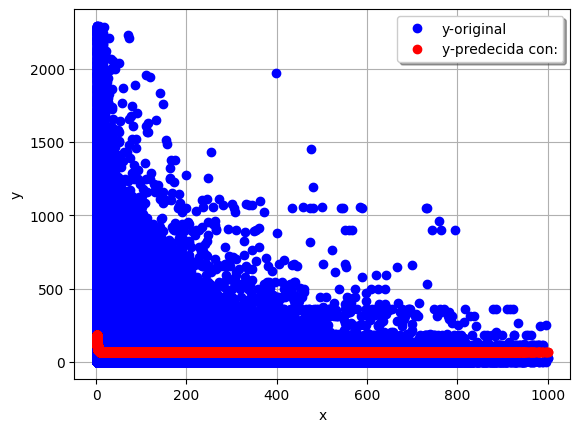

In [580]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [581]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.04642068843218039

In [582]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.21545460875131076)

#### **Modelo 2 - Función logarítmica**

In [583]:
def func2(x, a, b):
    return a * np.log(x) + b

In [584]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs= curve_fit(func2, df_numeric['Abundance_pm'], df_numeric['TaxonName'])

In [585]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-27.17483743, 153.46443379])

In [586]:
# Predicciones
y_pred2 = func2(x, *parametros2)

In [587]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,Abundance_pm
0,73.381761
1,128.834781
2,128.564382
3,109.728220
4,128.564382
...,...
1643867,129.367638
1643868,128.564382
1643869,128.767433
1643870,75.684590


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/322228218.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/322228218.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2,'bo', label="y-predecida con:", color= "red")


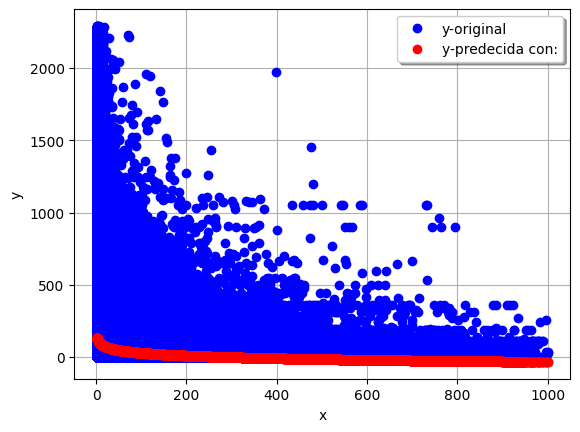

In [588]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred2,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [589]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)

R2_Modelo2_abs = abs(R2_Modelo2)
print("R² absoluto:", R2_Modelo2_abs)

R² absoluto: 0.057153994855402845


In [590]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2_abs)
R

np.float64(0.23906901692900911)

## **Taxon Code**

#### **Modelo 1 - Función cociente entre polinomios**

In [591]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['Abundance_nbcell']]
Var_Dep= df_numeric['TaxonCode']

In [592]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [593]:
#modelo poliniomios: 
def func_1(x, a, b, c):
    return ((a * x**2) + b) / (c * x**2)

In [594]:
#Ajustamos los parámetros de la función curve_fit
parametros_1, covs= curve_fit(func_1, df_numeric['Abundance_pm'], df_numeric['TaxonCode'])

In [595]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros_1

array([ 747.51478099, 5444.60883631,   11.3851407 ])

In [596]:
# Predicciones
y_pred_1 = func_1(x, *parametros_1)

In [597]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred_1

,Abundance_nbcell
0,73.129249
1,543.877654
2,543.877654
3,185.212203
4,543.877654
...,...
1643867,543.877654
1643868,543.877654
1643869,543.877654
1643870,75.416657


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/817078332.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/817078332.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_1,'bo', label="y-predecida con:", color= "red")


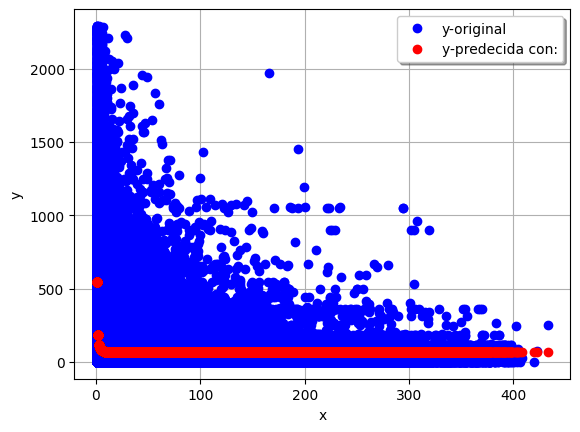

In [598]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_1,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [599]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo_1 = r2_score(y, y_pred_1) 
R2_Modelo_1 

-1.8703905510901642

In [600]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo_1))
R

np.float64(1.3676222252837822)

#### **Modelo 2 - Logarítmica**

In [601]:
def func_2(x, a, b):
    return a * np.log(x) + b

In [602]:
#Ajustamos los parámetros de la función curve_fit
parametros_2, covs= curve_fit(func_2, df_numeric['Abundance_pm'], df_numeric['TaxonCode'])

In [603]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros_2

array([-27.17483743, 153.46443379])

In [604]:
# Predicciones
y_pred_2 = func_2(x, *parametros_2)

In [605]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred_2

,Abundance_nbcell
0,96.955948
1,153.464434
2,153.464434
3,134.628272
4,153.464434
...,...
1643867,153.464434
1643868,153.464434
1643869,153.464434
1643870,100.584642


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/4227682154.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/4227682154.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_2,'bo', label="y-predecida con:", color= "red")


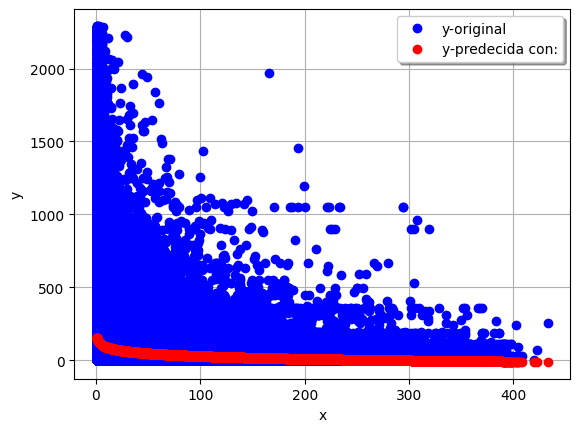

In [606]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_2,'bo', label="y-predecida con:", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [607]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo_2 = r2_score(y, y_pred_2) 
R2_Modelo_2

0.029048652308944045

In [608]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo_2)
R

np.float64(0.1704366518943154)

## **Sampling Operations Code**

#### **Modelo 1**

In [609]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df_numeric[['CodeSite_SamplingOperations']]
Var_Dep= df_numeric['SamplingOperations_code']

In [610]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

In [611]:
def func_s(x, a, b, c):
    return (a*(x**2)) + (b*x) + c 

In [612]:
#Ajustamos los parámetros de la función curve_fit
parametros_s, covs= curve_fit(func_s, df_numeric['CodeSite_SamplingOperations'], df_numeric['SamplingOperations_code'])

In [613]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros_s

array([-3.65524107e-04,  4.09248103e+00,  1.37625191e+04])

In [614]:
# Convertir la columna a numérica antes de usarla en la función
y_pred_s = func_s(x, *parametros_s)

In [615]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred_s

,CodeSite_SamplingOperations
0,21173.806419
1,16257.342653
2,17946.392719
3,24993.536655
4,17877.760012
...,...
1643867,19511.311383
1643868,22262.967239
1643869,15571.471314
1643870,15571.471314


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/4153698853.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/4153698853.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_s,'bo', label="y-predecida con", color= "red")


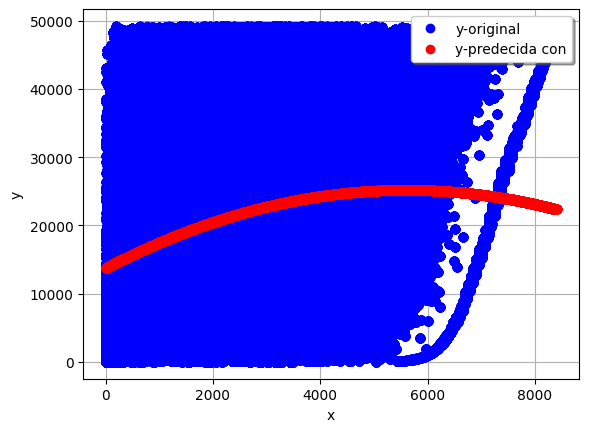

In [616]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_s,'bo', label="y-predecida con", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [617]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo_s = r2_score(y, y_pred_s) 
R2_Modelo_s

0.06958333985244647

In [618]:
R2 = np.sqrt(abs(R2_Modelo_s))
R2

np.float64(0.26378654221253683)

#### **Modelo 2**

In [619]:
def func_log(x, a, b):
    return (a*np.log(x)) + b

In [620]:
parametros_log, covs= curve_fit(func_log, df_numeric['CodeSite_SamplingOperations'], df_numeric['SamplingOperations_code'])
parametros_log

array([ 3284.77159849, -3874.5394911 ])

In [621]:
y_pred_log = func_log(x, *parametros_log)
y_pred_log

,CodeSite_SamplingOperations
0,21511.541164
1,17385.639793
2,19240.488955
3,24903.607606
4,19179.307405
...,...
1643867,20454.813554
1643868,22144.703692
1643869,16272.272203
1643870,16272.272203


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/3278846962.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/3278846962.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_log,'bo', label="y-predecida con y=(a*np.log(x)) + b", color= "red")


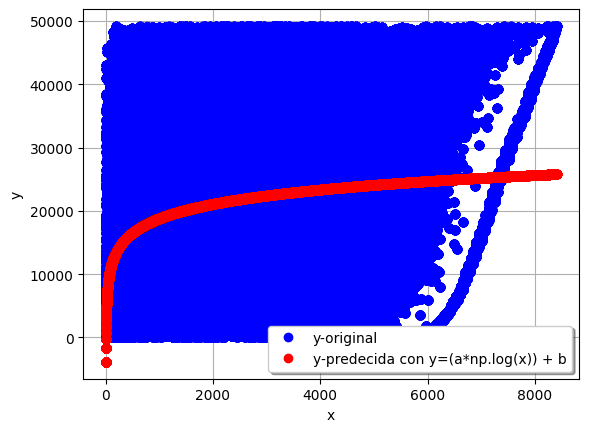

In [622]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_log,'bo', label="y-predecida con y=(a*np.log(x)) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [623]:
R2_Modelo_log = r2_score(y, y_pred_log) 
R2_Modelo_log

0.0905957436053606

In [624]:
R = np.sqrt(abs(R2_Modelo_log))
R

np.float64(0.30099126832079465)

## **Code Site Sampling Operation**

#### **Modelo 1**

In [625]:
Vars_Indep= df_numeric[['SamplingOperations_code']]
Var_Dep= df_numeric['CodeSite_SamplingOperations']

In [626]:
x= Vars_Indep
y= Var_Dep

In [627]:
def func_exp(x, a, b, c):
    return (a*np.exp(-b*x)) + c

In [628]:
parametros_exp, covs= curve_fit(func_exp, df_numeric['SamplingOperations_code'], df_numeric['CodeSite_SamplingOperations'])
parametros_exp

/opt/anaconda3/envs/Analitica/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 6.99263272e+02, -2.55125174e-05,  9.47577316e+02])

In [629]:
y_pred_exp = func_exp(x, *parametros_exp)
y_pred_exp

,SamplingOperations_code
0,2598.281468
1,2432.368259
2,2189.753650
3,1714.438721
4,1971.100170
...,...
1643867,1661.332038
1643868,1992.045033
1643869,2557.070040
1643870,1658.877960


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/2873459608.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/2873459608.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_exp,'bo', label="y-predecida con y=(a*np.exp(-b*x)) + c", color= "red")


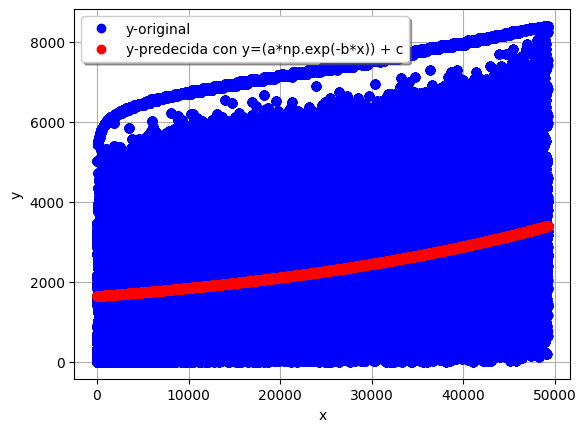

In [630]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_exp,'bo', label="y-predecida con y=(a*np.exp(-b*x)) + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [631]:
R2_Modelo_exp = r2_score(y, y_pred_exp) 
R2_Modelo_exp

0.059083293209571175

In [632]:
R = np.sqrt(abs(R2_Modelo_exp))
R

np.float64(0.24307055191769153)

#### **Modelo 2**

In [633]:
def func_3(x, a, b, c):
    return (a*x) + (b*x) + (c*x)

In [634]:
parametros3, covs= curve_fit(func_3, df_numeric['SamplingOperations_code'], df_numeric['CodeSite_SamplingOperations'])
parametros3

array([-141.39345471,   70.73945515,   70.73945515])

In [635]:
y_pred_3 = func_3(x, *parametros3)
y_pred_3

,SamplingOperations_code
0,2877.033060
1,2522.221485
2,1924.630605
3,309.092838
4,1276.108197
...,...
1643867,68.706287
1643868,1343.959929
1643869,2792.346578
1643870,57.169784


/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/368448764.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_29083/368448764.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred_3,'bo', label="y-predecida con y=(a*x) + (b*x) + (c*x)", color= "red")


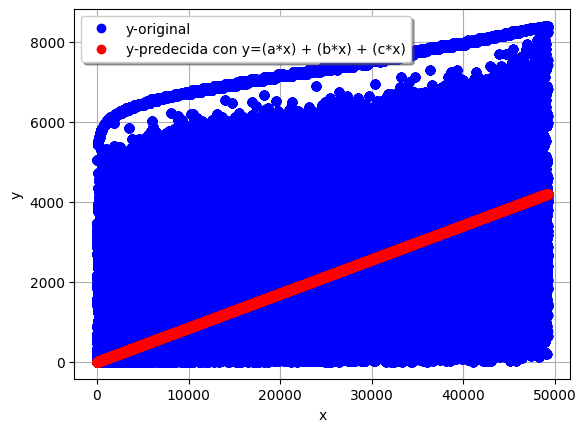

In [636]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred_3,'bo', label="y-predecida con y=(a*x) + (b*x) + (c*x)", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [637]:
R2_Modelo3 = r2_score(y, y_pred_3) 
R2_Modelo3

-0.16508603822605972

In [638]:
R = np.sqrt(abs(R2_Modelo3))
R

np.float64(0.4063078121646933)

## Actividad 4.1 Regresión Logarítmica

In [639]:
from sklearn.linear_model import LogisticRegression

In [640]:
df_numeric.columns

Index(['PrediccionesAbpm0', 'PrediccionesTotalAb0', 'PrediccionesAbnbcellO',
       'PrediccionesDateSamplingO', 'PrediccionesCodeSiteO',
       'PrediccionesSamplingO', 'PrediccionesTcode0', 'PrediccionesTname0',
       'TaxonName', 'TaxonCode', 'SamplingOperations_code',
       'CodeSite_SamplingOperations', 'Date_SamplingOperation',
       'Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm'],
      dtype='object')

### **Convertir variables a binarias**
#### Taxon Name

In [641]:
mediana = df_numeric['TaxonName'].median()
mediana

np.float64(38.0)

In [642]:
df_numeric['TaxonName_bin'] = df_numeric['TaxonName'].apply(lambda x: 1 if x > mediana else 0)
print(df_numeric[['TaxonName', 'TaxonName_bin']])

# Proporción de 0s y 1s
print(df_numeric['TaxonName_bin'].value_counts())

         TaxonName  TaxonName_bin
0             1706              1
1             1706              1
2              521              1
3              521              1
4              521              1
...            ...            ...
1643867       1342              1
1643868       1342              1
1643869       1342              1
1643870       1342              1
1643871       1342              1

[1643872 rows x 2 columns]
TaxonName_bin
0    830347
1    813525
Name: count, dtype: int64


#### Taxon Code

In [643]:
mediana2 = df_numeric['TaxonCode'].median()
mediana2

np.float64(38.0)

In [644]:
df_numeric['TaxonCode_bin'] = df_numeric['TaxonCode'].apply(lambda x: 1 if x > mediana2 else 0)
print(df_numeric[['TaxonCode', 'TaxonCode_bin']])

# Proporción de 0s y 1s
print(df_numeric['TaxonCode_bin'].value_counts())

         TaxonCode  TaxonCode_bin
0             1706              1
1             1706              1
2              521              1
3              521              1
4              521              1
...            ...            ...
1643867       1342              1
1643868       1342              1
1643869       1342              1
1643870       1342              1
1643871       1342              1

[1643872 rows x 2 columns]
TaxonCode_bin
0    830347
1    813525
Name: count, dtype: int64


#### Sampling Operations Code

In [645]:
mediana3= df_numeric['SamplingOperations_code'].median()
mediana3

np.float64(17910.5)

In [646]:
df_numeric['SamplingOperations_code_bin'] = df_numeric['SamplingOperations_code'].apply(lambda x: 1 if x > mediana3 else 0)
print(df_numeric[['SamplingOperations_code', 'SamplingOperations_code_bin']])

# Proporción de 0s y 1s
print(df_numeric['SamplingOperations_code_bin'].value_counts())

         SamplingOperations_code  SamplingOperations_code_bin
0                          33667                            1
1                          29515                            1
2                          22522                            1
3                           3617                            0
4                          14933                            0
...                          ...                          ...
1643867                      804                            0
1643868                    15727                            0
1643869                    32676                            1
1643870                      669                            0
1643871                     2798                            0

[1643872 rows x 2 columns]
SamplingOperations_code_bin
1    821936
0    821936
Name: count, dtype: int64


#### Code Site Sampling Operations

In [647]:
mediana4 = df_numeric['CodeSite_SamplingOperations'].median()
mediana4

np.float64(1688.0)

In [648]:
df_numeric['CodeSite_SamplingOperations_bin'] = df_numeric['CodeSite_SamplingOperations'].apply(lambda x: 1 if x > mediana4 else 0)
print(df_numeric[['CodeSite_SamplingOperations', 'CodeSite_SamplingOperations_bin']])

# Proporción de 0s y 1s
print(df_numeric['CodeSite_SamplingOperations_bin'].value_counts())

         CodeSite_SamplingOperations  CodeSite_SamplingOperations_bin
0                               2272                                1
1                                647                                0
2                               1138                                0
3                               6381                                1
4                               1117                                0
...                              ...                              ...
1643867                         1647                                0
1643868                         2755                                1
1643869                          461                                0
1643870                          461                                0
1643871                         2123                                1

[1643872 rows x 2 columns]
CodeSite_SamplingOperations_bin
0    822007
1    821865
Name: count, dtype: int64


##### Date Sampling Operations

In [649]:
df_numeric['Date_SamplingOperation'] = pd.to_datetime(df_numeric['Date_SamplingOperation'], errors='coerce')

In [650]:
mediana5 = df_numeric['Date_SamplingOperation'].median()
mediana5

Timestamp('1970-01-01 00:00:00.000000360')

In [651]:
df_numeric['Date_SamplingOperation_bin'] = df_numeric['Date_SamplingOperation'].apply(lambda x: 1 if x > mediana5 else 0)
print(df_numeric[['Date_SamplingOperation', 'Date_SamplingOperation_bin']])

# Proporción de 0s y 1s
print(df_numeric['Date_SamplingOperation_bin'].value_counts())

               Date_SamplingOperation  Date_SamplingOperation_bin
0       1970-01-01 00:00:00.000000772                           1
1       1970-01-01 00:00:00.000000149                           0
2       1970-01-01 00:00:00.000000949                           1
3       1970-01-01 00:00:00.000000499                           1
4       1970-01-01 00:00:00.000000063                           0
...                               ...                         ...
1643867 1970-01-01 00:00:00.000000012                           0
1643868 1970-01-01 00:00:00.000000351                           0
1643869 1970-01-01 00:00:00.000000452                           1
1643870 1970-01-01 00:00:00.000000245                           0
1643871 1970-01-01 00:00:00.000000283                           0

[1643872 rows x 2 columns]
Date_SamplingOperation_bin
0    822694
1    821178
Name: count, dtype: int64


In [652]:
df_numeric.head()

,PrediccionesAbpm0,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,...,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm,TaxonName_bin,TaxonCode_bin,SamplingOperations_code_bin,CodeSite_SamplingOperations_bin,Date_SamplingOperation_bin
0,-48.011670,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,...,2272,1970-01-01 00:00:00.000000772,8,420,19.047619,1,1,1,1,1
1,-51.031541,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,...,647,1970-01-01 00:00:00.000000149,1,404,2.475248,1,1,1,0,0
2,8.075914,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,...,1138,1970-01-01 00:00:00.000000949,1,400,2.500000,1,1,1,0,1
3,-5.674245,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,...,6381,1970-01-01 00:00:00.000000499,2,400,5.000000,1,1,0,1,1
4,2.556212,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,...,1117,1970-01-01 00:00:00.000000063,1,400,2.500000,1,1,0,0,0


In [653]:
# 1 == YES
# 0 == NO

### **Regresión 1 = Taxon Name**

In [654]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm']]
Var_Dep= df_numeric['TaxonName_bin']
X= Vars_Indep
y= Var_Dep

In [655]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [656]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(493162,))

In [657]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 91038 157888]
 [ 32359 211877]]


In [658]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.5730044758157208


In [659]:
# precisión de 0
precision = precision_score(y_test, y_pred, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.7377650996377546


In [660]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6142302123845714


In [661]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.8675092942891302


In [662]:
# sensibilidad 0
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.3657231466379567


In [663]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.6901519704365302


In [664]:
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.48902700074934935


In [665]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.37      0.49    248926
           1       0.57      0.87      0.69    244236

    accuracy                           0.61    493162
   macro avg       0.66      0.62      0.59    493162
weighted avg       0.66      0.61      0.59    493162



### **Regresión 2 = Taxon Code**

In [666]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm']]
Var_Dep= df_numeric['TaxonCode_bin']
X1= Vars_Indep
y1= Var_Dep

In [667]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state =None)
escalar1 = StandardScaler()
X_train1 = escalar1.fit_transform(X_train1)
X_test1 = escalar1.transform(X_test1)
algoritmo1 = LogisticRegression()
algoritmo1.fit(X_train1, y_train1)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [668]:
#Realizamos una predicción
y_pred1 = algoritmo.predict(X_test1) 
y_pred1

array([1, 1, 1, ..., 0, 1, 1], shape=(493162,))

In [669]:
#Verifico la matriz de Confusión
matriz1 = confusion_matrix(y_test1, y_pred1)
print('Matriz de Confusión:')
print(matriz1)

Matriz de Confusión:
[[ 92348 157019]
 [ 32614 211181]]


In [670]:
#Calculo la precisión del modelo
precision = precision_score(y_test1, y_pred1, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.573549701249321


In [671]:
precision = precision_score(y_test1, y_pred1, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.7390086586322242


In [672]:
# Exactitud
exactitud = accuracy_score(y_test1, y_pred1)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.6154752393736743


In [673]:
#Sensibilidad 1
sensibilidad = recall_score(y_test1, y_pred1, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.8662236715273077


In [674]:
# sensibilidad 0
sensibilidad = recall_score(y_test1, y_pred1, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.37032967473643263


In [675]:
# F1 del 1
puntajef1 = f1_score(y_test1, y_pred1, average="binary", pos_label=1)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.6901396253237363


In [676]:
# f1 del 0
puntajef1 = f1_score(y_test1, y_pred1, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.4934055336348506


In [710]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.37      0.49    249367
           1       0.57      0.87      0.69    243795

    accuracy                           0.62    493162
   macro avg       0.66      0.62      0.59    493162
weighted avg       0.66      0.62      0.59    493162



### **Regresión 3 = Sampling Operations Code**

In [677]:
Vars_Indep1= df_numeric[['CodeSite_SamplingOperations_bin', 'Date_SamplingOperation_bin']]
Var_Dep1= df_numeric['SamplingOperations_code_bin']
X2= Vars_Indep1
y2= Var_Dep1

In [678]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state =None)
escalar2 = StandardScaler()
X_train2 = escalar2.fit_transform(X_train2)
X_test2 = escalar2.transform(X_test2)
algoritmo2 = LogisticRegression()
algoritmo2.fit(X_train2, y_train2)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [679]:
# Predicciones
y_pred2 = algoritmo2.predict(X_test2) 
y_pred2

array([1, 0, 0, ..., 0, 1, 0], shape=(493162,))

In [680]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test2, y_pred2)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[146487  99825]
 [ 99954 146896]]


In [681]:
# precisión 1
precision = precision_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.5953931769083296


In [682]:
# presición 0
precision = precision_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.5944100210598074


In [683]:
# exactitud
exactitud = accuracy_score(y_test2, y_pred2)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5949018780846862


In [684]:
# Sensibilidad 1
sensibilidad = recall_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.5950820336236581


In [685]:
# sensibilidad 0
sensibilidad = recall_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.5947213290460879


In [686]:
# f1 de 1
puntajef1 = f1_score(y_test2, y_pred2, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.5952375646057001


In [687]:
# f1 de 0
puntajef1 = f1_score(y_test2, y_pred2, average="binary", pos_label=0)
print('Puntaje F1 del  label 0:')
print(puntajef1)

Puntaje F1 del  label 0:
0.5945656343035963


In [711]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59    246312
           1       0.60      0.60      0.60    246850

    accuracy                           0.59    493162
   macro avg       0.59      0.59      0.59    493162
weighted avg       0.59      0.59      0.59    493162



### **Regresión 4 = Code Site Sampling Operations**

In [688]:
Vars_Indep2= df_numeric[['SamplingOperations_code_bin', 'Abundance_pm', 'TaxonName_bin']]
Var_Dep2= df_numeric['CodeSite_SamplingOperations_bin']
X3= Vars_Indep2
y3= Var_Dep2

In [689]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state =None)
escalar3 = StandardScaler()
X_train3 = escalar3.fit_transform(X_train3)
X_test3 = escalar3.transform(X_test3)
algoritmo3 = LogisticRegression()
algoritmo3.fit(X_train3, y_train3)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [690]:
# predicciones
y_pred3 = algoritmo3.predict(X_test3) 
y_pred3

array([1, 0, 1, ..., 1, 0, 0], shape=(493162,))

In [691]:
# matriz
matriz = confusion_matrix(y_test3, y_pred3)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[146663  99951]
 [ 99957 146591]]


In [692]:
# presición 1
precision = precision_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.5945883460018982


In [693]:
# presición 0
precision = precision_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.5946922390722569


In [694]:
# exactitud
exactitud = accuracy_score(y_test3, y_pred3)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5946403007530994


In [695]:
# sesibilidad de 1
sensibilidad = recall_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.5945738760809254


In [696]:
# sesibilidad de 0
sensibilidad = recall_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.5947067076483898


In [697]:
# f1 de 1
puntajef1 = f1_score(y_test3, y_pred3, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.5945811109533756


In [698]:
# f1 de 0
puntajef1 = f1_score(y_test3, y_pred3, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.5946994732723211


In [712]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59    246614
           1       0.59      0.59      0.59    246548

    accuracy                           0.59    493162
   macro avg       0.59      0.59      0.59    493162
weighted avg       0.59      0.59      0.59    493162



### **Regresión 5 = Date Sampling Soperation**

In [699]:
Vars_Indep3= df_numeric[['TotalAbundance_SamplingOperation','Abundance_pm']]
Var_Dep3= df_numeric['Date_SamplingOperation_bin']
X4= Vars_Indep3
y4= Var_Dep3

In [700]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state =None)
escalar4 = StandardScaler()
X_train4 = escalar4.fit_transform(X_train4)
X_test4 = escalar4.transform(X_test4)
algoritmo4 = LogisticRegression()
algoritmo4.fit(X_train4, y_train4)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [701]:
# predicciones
y_pred4 = algoritmo4.predict(X_test4) 
y_pred4

array([0, 0, 0, ..., 0, 0, 1], shape=(493162,))

In [702]:
# matriz
matriz = confusion_matrix(y_test4, y_pred4)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[161552  85521]
 [161026  85063]]


In [703]:
# precisión de 1
precision = precision_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Precisión del modelo label 1:')
print(precision)

Precisión del modelo label 1:
0.4986575528771749


In [704]:
# precisión de 0
precision = precision_score(y_test4, y_pred4, average="binary", pos_label=0)
print('Precisión del modelo label 0:')
print(precision)

Precisión del modelo label 0:
0.5008153066855148


In [705]:
# exactitud
exactitud = accuracy_score(y_test4, y_pred4)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5000689428625887


In [706]:
# sesibilidad 1
sensibilidad = recall_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Sensibilidad del modelo label 1:')
print(sensibilidad)

Sensibilidad del modelo label 1:
0.34565949717378674


In [707]:
# sesibilidad 0
sensibilidad = recall_score(y_test4, y_pred4, average="binary", pos_label=0)
print('Sensibilidad del modelo label 0:')
print(sensibilidad)

Sensibilidad del modelo label 0:
0.6538634330744355


In [708]:
# f1 de 1
puntajef1 = f1_score(y_test4, y_pred4, average="binary", pos_label=1)
print('Puntaje F1 del modelo label 1:')
print(puntajef1)

Puntaje F1 del modelo label 1:
0.40829619389785277


In [709]:
# f1 de 0
puntajef1 = f1_score(y_test4, y_pred4, average="binary", pos_label=0)
print('Puntaje F1 del modelo label 0:')
print(puntajef1)

Puntaje F1 del modelo label 0:
0.5671964062206509


In [713]:
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.50      0.65      0.57    247073
           1       0.50      0.35      0.41    246089

    accuracy                           0.50    493162
   macro avg       0.50      0.50      0.49    493162
weighted avg       0.50      0.50      0.49    493162

